# Distribution across companies of the four stress types of stock growth values

In [39]:
import numpy as np
import os
import sys
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [40]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.serif": ["Helvetica"],
})

## Read in master data

In [4]:
data = pd.read_csv('../../preprocessed/company_master.csv')
df = data.copy()

array([[<AxesSubplot:title={'center':'$log(stock\\ growth_{[14-19]})$'}>]],
      dtype=object)

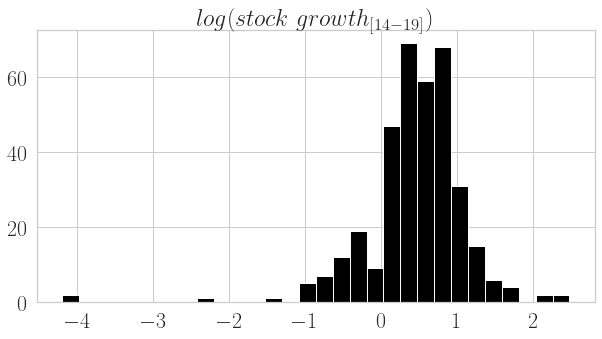

In [5]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
df[['log_stock_growth_2014']].\
    rename(columns={'log_stock_growth_2014':'$log(stock\ growth_{[14-19]})$'}).hist(figsize=(10,5),bins=30, color='black')

array([[<AxesSubplot:title={'center':'$log(stock\\ growth_{[09-19]})$'}>]],
      dtype=object)

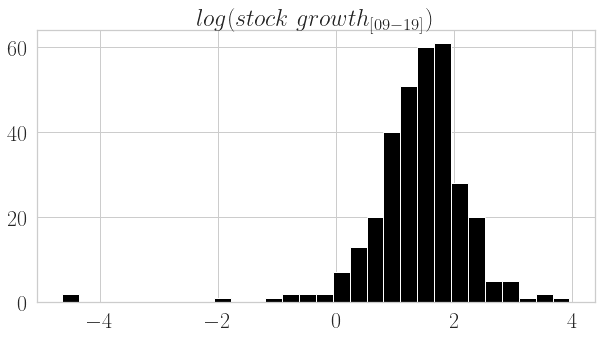

In [6]:
sns.set(font_scale=2)
sns.set_style("whitegrid")
df[['log_stock_growth_2009']].\
    rename(columns={'log_stock_growth_2009':'$log(stock\ growth_{[09-19]})$'}).hist(figsize=(10,5),bins=30, color='black')

# Plots

In [7]:
LABELS = {
    'Q1':'low stress',
    'Q2': 'passive',
    'Q3': 'negative stress',
    'Q4': 'positive stress'
}

In [8]:
COLORS =  {"Q1":"seagreen",
           "Q2":"black",
           "Q3":"firebrick", 
           "Q4":"gold"
          }

In [9]:
Qjitter = {
    'Q1': -0.3,
    'Q2': 0,
    'Q3': 0.3,
    'Q4': 0.6
}

# Uncomment or not for FILTERING

In [10]:
df = data[data['total_posts']>300]
len(df)

279

In [11]:
sorted(df['Q'].astype(str).unique().tolist())

['Q1', 'Q2', 'Q3', 'Q4']

# 2009 stress percentile

In [12]:
def plot_2009_growth_stress_percentile(industry='all', percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    fig, ax = plt.subplots(figsize=(18, 7))
    quadrants = sorted(df['Q'].unique().tolist())
    labels = []
    
    if industry != 'all':
        all_companies_industry = df[df['GICSSector'] == industry].copy()
    else:
        all_companies_industry = df.copy()
        
        
    print('all: ', len(all_companies_industry))

    for q in quadrants:
        
#         print (q)

        Q_slice = all_companies_industry[all_companies_industry['Q'] == q]
        
#         print(Q_slice)

        Q_slice.sort_values('pct_stress', inplace=True)
        Q_slice = Q_slice.dropna(subset=['log_stock_growth_2009','pct_stress'])

        percentile_data = {'x':[], 'y':[], 'yerr':[]} 

        for k in percentiles:
            Q_slice_top_percentile = Q_slice.head(int(len(Q_slice)*k))
            
#             print('top ', k, len(Q_slice_top_percentile), len(Q_slice))

            percentile_data['x'].append(k*100+Qjitter[q]) 
            lgmean = stats.gmean(Q_slice_top_percentile['stock_growth_2009'])
            lgstd = stats.gstd(Q_slice_top_percentile['stock_growth_2009'])
            percentile_data['y'].append( lgmean )
            percentile_data['yerr'].append( lgmean / np.sqrt(len(Q_slice_top_percentile)) *\
                                           np.std(Q_slice_top_percentile['log_stock_growth_2009']) )


            percentile_df = pd.DataFrame(percentile_data) 

        ax.scatter(percentile_df['x'].values,
                percentile_df['y'].values, color=COLORS.get(q))
        plt.errorbar(percentile_df['x'].values,
                     percentile_df['y'].values,
                    yerr=percentile_df['yerr'].values, capsize=10, color=COLORS.get(q))
        labels.append(LABELS.get(q))

    ax.set_xlabel('top stress score percentile', fontsize=30)
    ax.set_ylabel(r'$\bar{GM}({stock\ growth_{[09-19]}})$', fontsize=30)
    # ax.invert_xaxis()

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(25)


    if industry == 'all':
        plt.legend(labels, ncol=4, loc='upper left', 
               bbox_to_anchor=[0.16, 1.25], 
               columnspacing=1.0, labelspacing=0.0,
               handletextpad=0.0, handlelength=1.5,
               fancybox=True, shadow=True,fontsize=28 )
    else:
        plt.legend(labels, ncol=4, loc='upper left', 
               bbox_to_anchor=[0.16, 1.35], 
               columnspacing=1.0, labelspacing=0.0,
               handletextpad=0.0, handlelength=1.5,
               fancybox=True, shadow=True,fontsize=28 )


    plt.axhline(y=1, color="gray", linestyle="--")
    if industry != 'all':
        plt.title(industry)
    plt.tight_layout()

#     plt.savefig("../../results/stocks/stress_percentile_stock_growth_2009_"+industry+".png", dpi=200)

all:  279


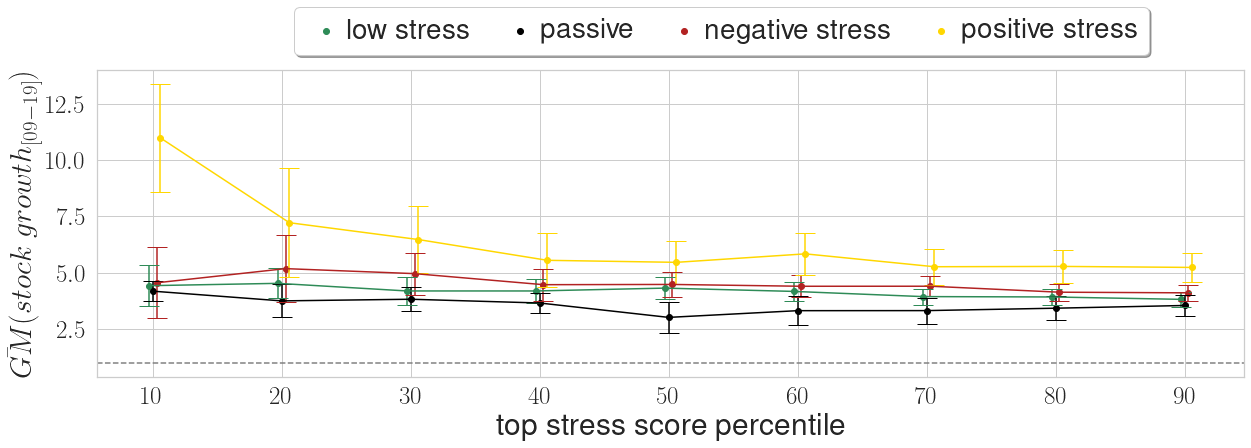

In [13]:
plot_2009_growth_stress_percentile(industry='all', percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

all:  50


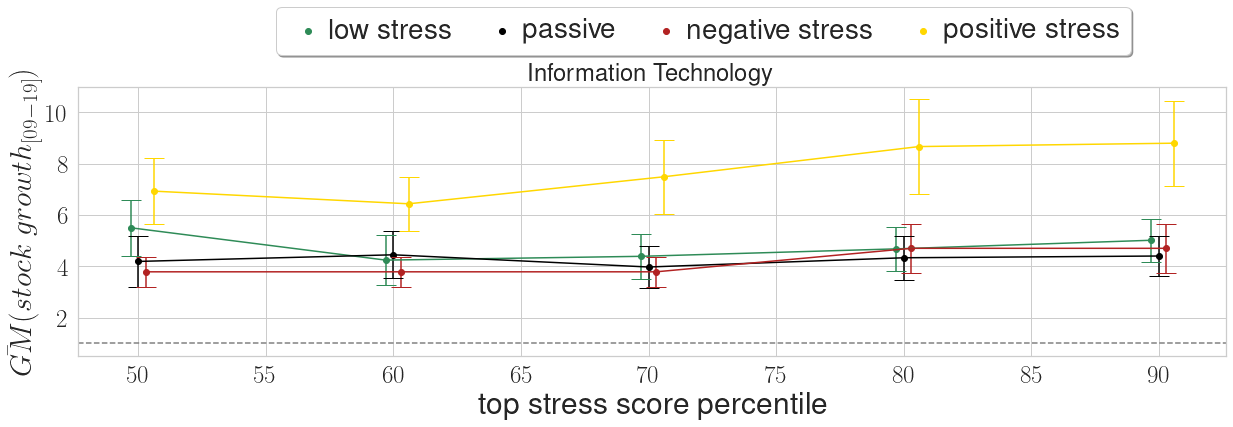

In [14]:
df = data[data['total_posts']>100]
plot_2009_growth_stress_percentile(industry='Information Technology', percentiles=[0.5, 0.6, 0.7, 0.8, 0.9])

all:  38


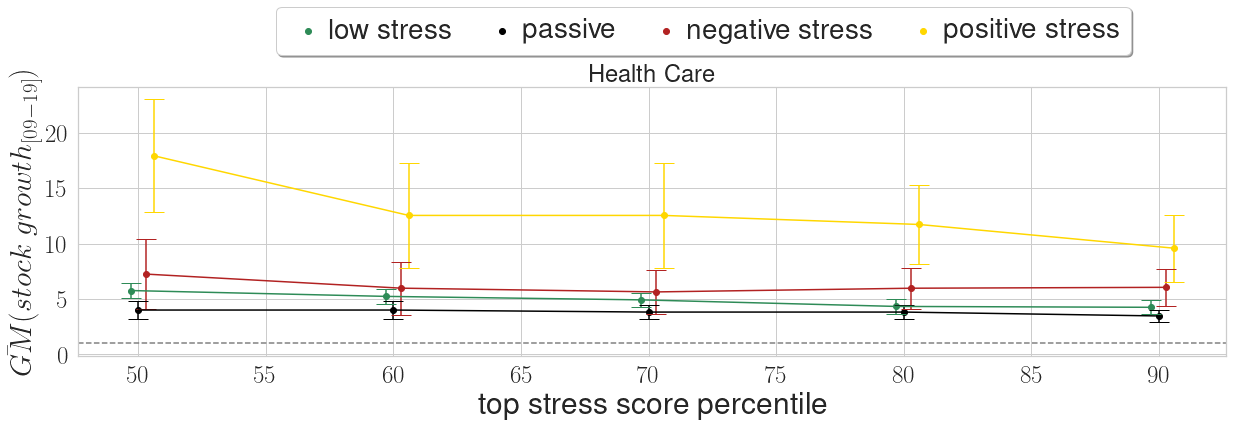

In [15]:
plot_2009_growth_stress_percentile(industry='Health Care', percentiles=[0.5, 0.6, 0.7, 0.8, 0.9])

all:  36


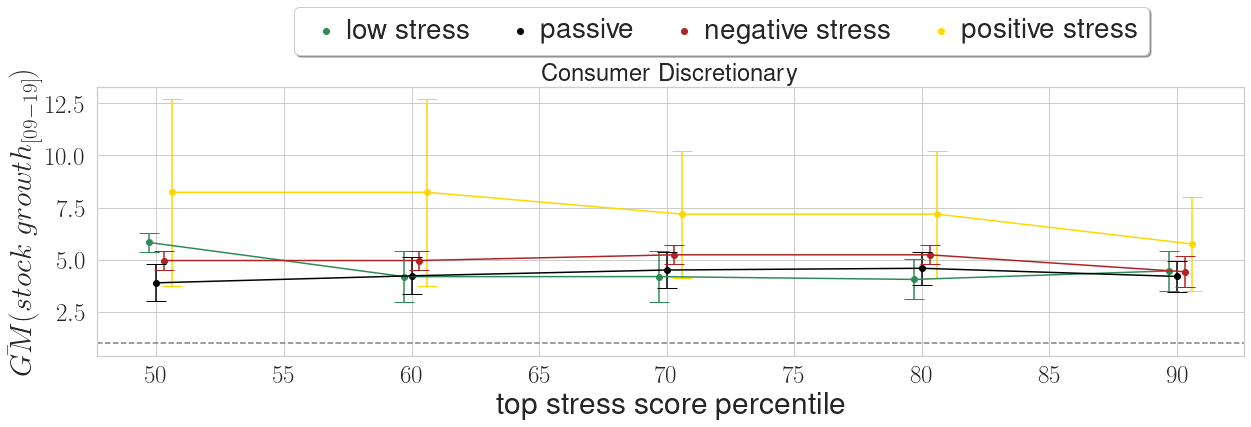

In [16]:
plot_2009_growth_stress_percentile(industry='Consumer Discretionary', percentiles=[0.5, 0.6, 0.7, 0.8, 0.9])

# 2014 stress percentile

In [17]:
def plot_2014_growth_stress_percentile(industry='all', percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    fig, ax = plt.subplots(figsize=(18, 7))
    quadrants = sorted(df['Q'].unique().tolist())
    labels = []
    
    if industry != 'all':
        all_companies_industry = df[df['GICSSector'] == industry].copy()
    else:
        all_companies_industry = df.copy()
        
        
    print('all: ', len(all_companies_industry))

    for q in quadrants:
        
#         print (q)

        Q_slice = all_companies_industry[all_companies_industry['Q'] == q]
        
#         print(Q_slice)

        Q_slice.sort_values('pct_stress', inplace=True)
        Q_slice = Q_slice.dropna(subset=['log_stock_growth_2014','pct_stress'])

        percentile_data = {'x':[], 'y':[], 'yerr':[]} 

        for k in percentiles:
            Q_slice_top_percentile = Q_slice.head(int(len(Q_slice)*k))
            
#             print('top ', k, len(Q_slice_top_percentile), len(Q_slice))

            percentile_data['x'].append(k*100+Qjitter[q]) 
            lgmean = stats.gmean(Q_slice_top_percentile['stock_growth_2014'])
            lgstd = stats.gstd(Q_slice_top_percentile['stock_growth_2014'])
            percentile_data['y'].append( lgmean )
            percentile_data['yerr'].append( lgmean / np.sqrt(len(Q_slice_top_percentile)) *\
                                           np.std(Q_slice_top_percentile['log_stock_growth_2014']) )


            percentile_df = pd.DataFrame(percentile_data) 

        ax.scatter(percentile_df['x'].values,
                percentile_df['y'].values, color=COLORS.get(q))
        plt.errorbar(percentile_df['x'].values,
                     percentile_df['y'].values,
                    yerr=percentile_df['yerr'].values, capsize=10, color=COLORS.get(q))
        labels.append(LABELS.get(q))

    ax.set_xlabel('top stress score percentile', fontsize=30)
    ax.set_ylabel(r'$\bar{GM}({stock\ growth_{[14-19]}})$', fontsize=30)
    # ax.invert_xaxis()

    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontsize(25)


    if industry == 'all':
        plt.legend(labels, ncol=4, loc='upper left', 
               bbox_to_anchor=[0.16, 1.25], 
               columnspacing=1.0, labelspacing=0.0,
               handletextpad=0.0, handlelength=1.5,
               fancybox=True, shadow=True,fontsize=28 )
    else:
        plt.legend(labels, ncol=4, loc='upper left', 
               bbox_to_anchor=[0.16, 1.35], 
               columnspacing=1.0, labelspacing=0.0,
               handletextpad=0.0, handlelength=1.5,
               fancybox=True, shadow=True,fontsize=28 )


    plt.axhline(y=1, color="gray", linestyle="--")
    if industry != 'all':
        plt.title(industry)
    plt.tight_layout()

#     plt.savefig("../../results/stocks/stress_percentile_stock_growth_2014_"+industry+".png", dpi=200)

all:  344


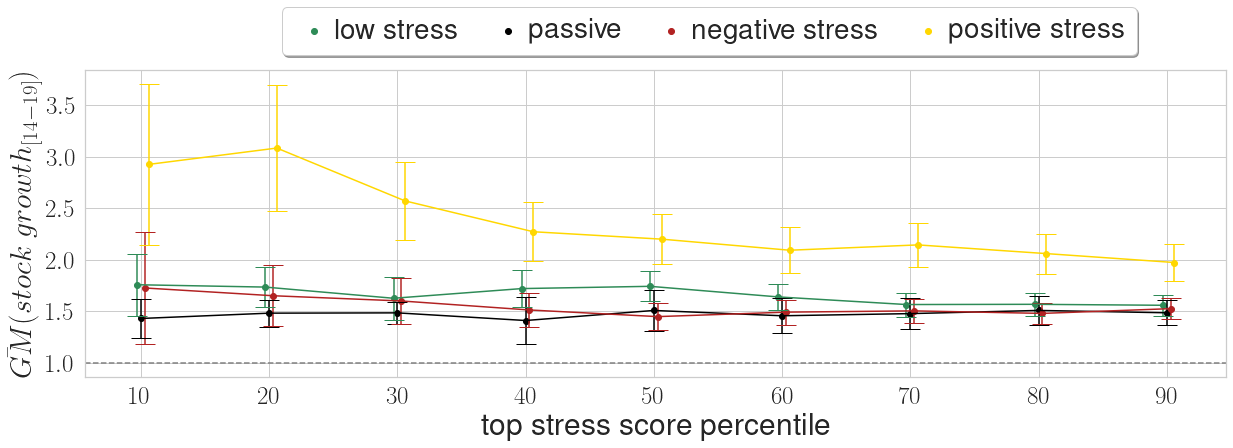

In [18]:
plot_2014_growth_stress_percentile()

all:  38


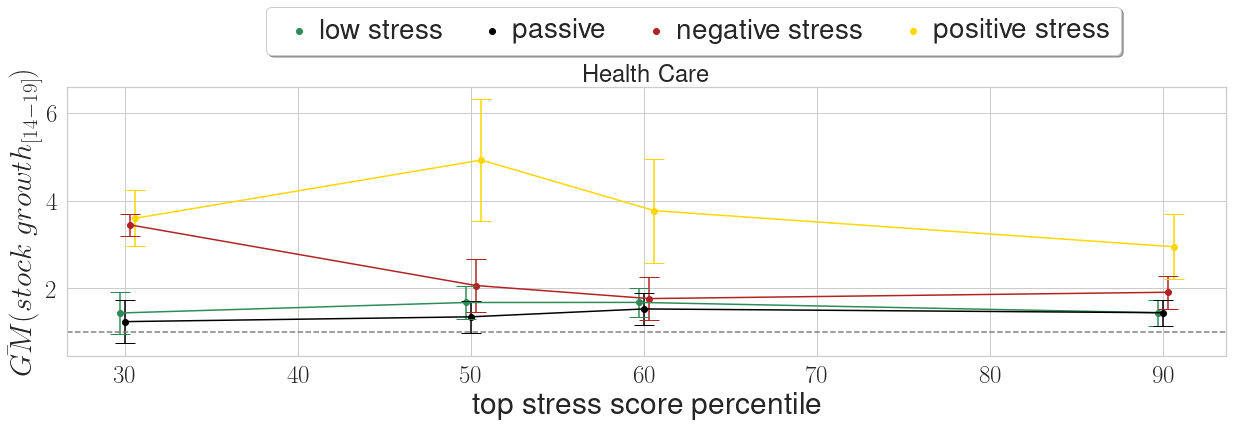

In [19]:
plot_2014_growth_stress_percentile(industry='Health Care', percentiles=[0.3, 0.5, 0.6, 0.9])

all:  50


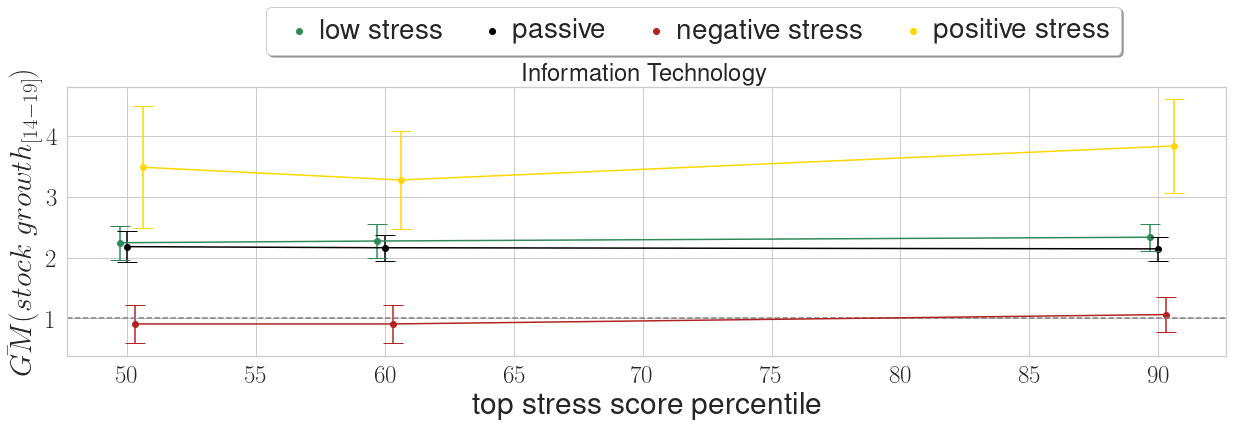

In [20]:
plot_2014_growth_stress_percentile(industry='Information Technology', percentiles=[0.5, 0.6, 0.9])

all:  36


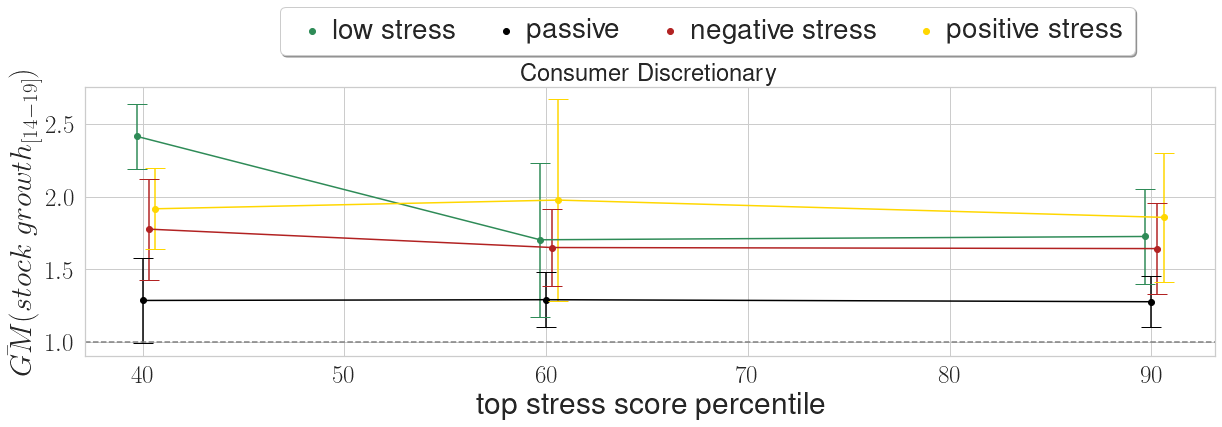

In [21]:
plot_2014_growth_stress_percentile(industry='Consumer Discretionary', percentiles=[0.4, 0.6, 0.9])

In [23]:
df = pd.read_csv("../../preprocessed/company_master.csv")
df = df[df['total_posts']>300]

# 2009 rating percentile -- no stress-type dissagregation

279


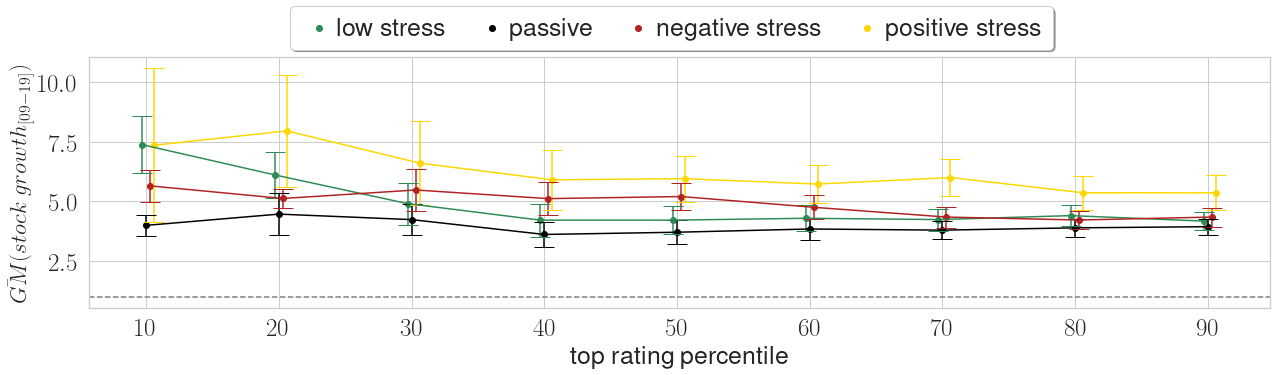

In [24]:
# plot each quadrant's topK. scale each quadrant (not currently being used): see the next version
sns.set(font_scale=2)
sns.set_style("whitegrid")

print (len(df))

fig, ax = plt.subplots(figsize=(18, 6))
quadrants = sorted(df['Q'].unique().tolist())
labels = []

for q in ['Q1', 'Q2', 'Q3', 'Q4']:

    Q_slice = df[df['Q'] == q]
    
    Q_slice.sort_values('rating_overall', ascending=False, inplace=True)
    Q_slice = Q_slice.dropna()
    
    percentile_data = {'x':[], 'y':[], 'yerr':[]} # , 'lower_yerr': [], 'upper_yerr': []
    
    for k in range(1,10):
        Q_slice_top_percentile = Q_slice.head(int(len(Q_slice)/10*k))
        
        percentile_data['x'].append(k*10+Qjitter[q]) 
        lgmean = stats.gmean(Q_slice_top_percentile['stock_growth_2009'])
        lgstd = stats.gstd(Q_slice_top_percentile['stock_growth_2009'])
        percentile_data['y'].append( lgmean )
        percentile_data['yerr'].append( lgmean / np.sqrt(len(Q_slice_top_percentile)) *\
                                       np.std(Q_slice_top_percentile['log_stock_growth_2009']) )

    
        percentile_df = pd.DataFrame(percentile_data) 
    
    ax.scatter(percentile_df['x'].values,
            percentile_df['y'].values, color=COLORS.get(q))
    plt.errorbar(percentile_df['x'].values,
                 percentile_df['y'].values,
                yerr=percentile_df['yerr'].values, capsize=10, color=COLORS.get(q))
    labels.append(LABELS.get(q))

ax.set_xlabel('top rating percentile', fontsize=25)
ax.set_ylabel(r'$\bar{GM}({stock\ growth_{[09-19]}})$', fontsize=23)
# ax.invert_xaxis()
    
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(25)


plt.legend(labels, ncol=4, loc='upper left', 
           bbox_to_anchor=[0.16, 1.25], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True,fontsize=25 )

# plt.axhline(y=np.abs(min(all_companies['stock_growth'])), color="gray", linestyle="--")
# plt.ylim([110, 250])
plt.axhline(y=1, color="gray", linestyle="--")

plt.tight_layout()

# plt.savefig("../../results/stocks/rating_percentile_stock_growth_2009.png", dpi=200)

## The average overall stock growth across four stress types 

In [25]:
min(df['stock_growth_2009'])

0.0096844366293792

In [26]:
Q_pos = df[df['Q'] == 'Q4']

Q_nonpos = df[df['Q'] != 'Q4']

In [27]:
Q_neg = df[df['Q'] == 'Q3']

In [28]:
Q_low = df[df['Q'] == 'Q1']

In [29]:
Q_passive = df[df['Q'] == 'Q2']

In [30]:
stats.gmean(Q_pos['stock_growth_2014'].dropna()), min(Q_pos['stock_growth_2014']), max(Q_pos['stock_growth_2014'])

(2.0214055310931474, 0.4674776288442371, 11.99393681202103)

In [31]:
stats.gmean(Q_neg['stock_growth_2014'].dropna()), min(Q_neg['stock_growth_2014']), max(Q_neg['stock_growth_2014'])

(1.3595160108612536, 0.0149920097868111, 5.170493331460046)

In [32]:
stats.gmean(Q_low['stock_growth_2014'].dropna()), min(Q_low['stock_growth_2014']), max(Q_low['stock_growth_2014'])

(1.5327588092335187, 0.1041983649528169, 4.8939149997774125)

In [33]:
stats.gmean(Q_passive['stock_growth_2014'].dropna()), min(Q_passive['stock_growth_2014']), max(Q_passive['stock_growth_2014'])


(1.4899775354778273, 0.0149920091604383, 8.176011018161336)

In [34]:
stats.gmean(Q_pos['stock_growth_2009'].dropna()),\
    min(Q_pos['stock_growth_2009']), max(Q_pos['stock_growth_2009'])

(5.224176913864315, 1.1194817940882615, 52.02001777100038)

In [35]:
stats.gmean(Q_neg['stock_growth_2009'].dropna()),\
    min(Q_neg['stock_growth_2009']), max(Q_neg['stock_growth_2009'])

(3.6778659862344143, 0.0108655312258, 26.367633707158724)

In [36]:
stats.gmean(Q_low['stock_growth_2009'].dropna()),\
    min(Q_low['stock_growth_2009']), max(Q_low['stock_growth_2009'])

(3.8913307158191337, 0.4938848598492394, 16.056079261437738)

In [37]:
stats.gmean(Q_passive['stock_growth_2009'].dropna()),\
    min(Q_passive['stock_growth_2009']), max(Q_passive['stock_growth_2009'])

(3.4369332150716367, 0.0096844366293792, 10.548869574284522)

In [38]:
stats.gmean(Q_nonpos['stock_growth_2009'].dropna()),\
    min(Q_nonpos['stock_growth_2009']), max(Q_nonpos['stock_growth_2009'])

(3.6904335877643595, 0.0096844366293792, 26.367633707158724)